Telecom X – Parte 2: Predicción de Cancelación (Churn)

🎯 Misión

Tu nueva misión es desarrollar modelos predictivos capaces de prever qué clientes tienen mayor probabilidad de cancelar sus servicios.

La empresa quiere anticiparse al problema de la cancelación, y te corresponde a ti construir un pipeline robusto para esta etapa inicial de modelado.

🧠 Objetivos del Desafío

  Preparar los datos para el modelado (tratamiento, codificación, normalización).

  Realizar análisis de correlación y selección de variables.

  Entrenar dos o más modelos de clasificación.

  Evaluar el rendimiento de los modelos con métricas.

  Interpretar los resultados, incluyendo la importancia de las variables.

  Crear una conclusión estratégica señalando los principales factores que influyen en la cancelación.



# Extracción del Archivo Tratado

In [1]:
import pandas as pd

df = pd.read_csv('/content/datos_tratados.csv')
display(df.head())

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total,diario
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   int64  
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   int64  
 5   Dependents        7043 non-null   int64  
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   int64  
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 


# Eliminación de Columnas Irrelevantes

Se eliminarán las siguientes columnas:
customerID        

In [ ]:
df = df.drop(columns=['customerID', 'Monthly'])

In [5]:
for col in df.select_dtypes(include='object').columns:
    print(f"'{col}': {df[col].unique()}")

'customerID': ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
'gender': ['Female' 'Male']
'MultipleLines': ['0' '1' 'No phone service']
'InternetService': ['DSL' 'Fiber optic' '0']
'OnlineSecurity': ['0' '1' 'No internet service']
'OnlineBackup': ['1' '0' 'No internet service']
'DeviceProtection': ['0' '1' 'No internet service']
'TechSupport': ['1' '0' 'No internet service']
'StreamingTV': ['1' '0' 'No internet service']
'StreamingMovies': ['0' '1' 'No internet service']
'Contract': ['One year' 'Month-to-month' 'Two year']
'PaymentMethod': ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


In [6]:
# Identificar columnas categoricas y quitar churn
categorical_cols = df.select_dtypes(include='object').columns.tolist()
if 'Churn' in categorical_cols:
    categorical_cols.remove('Churn')

# Aplicar one-hot
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

display(df_encoded.head())

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Monthly,Total,diario,...,TechSupport_No internet service,StreamingTV_1,StreamingTV_No internet service,StreamingMovies_1,StreamingMovies_No internet service,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,1,9,1,1,65.6,593.30,2.186667,...,False,True,False,False,False,True,False,False,False,True
1,0,0,0,0,9,1,0,59.9,542.40,1.996667,...,False,False,False,True,False,False,False,False,False,True
2,1,0,0,0,4,1,1,73.9,280.85,2.463333,...,False,False,False,False,False,False,False,False,True,False
3,1,1,1,0,13,1,1,98.0,1237.85,3.266667,...,False,True,False,True,False,False,False,False,True,False
4,1,1,1,0,3,1,1,83.9,267.40,2.796667,...,False,True,False,False,False,False,False,False,False,True


In [7]:
df_encoded.iloc[5]

,5
Churn,0
SeniorCitizen,0
Partner,0
Dependents,1
tenure,9
...,...
Contract_One year,False
Contract_Two year,False
PaymentMethod_Credit card (automatic),True
PaymentMethod_Electronic check,False


## Verificación de la Proporción de Cancelación (Churn)

In [10]:
churn_conteo = df['Churn'].value_counts()
churn_proporcion = churn_conteo / len(df)

print(churn_conteo)
print(churn_proporcion)


Churn
0    5174
1    1869
Name: count, dtype: int64
Churn
0    0.73463
1    0.26537
Name: count, dtype: float64


In [14]:
from imblearn.over_sampling import RandomOverSampler

X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)


print("Nueva distribucion despues del oversampling:")
print(y_resampled.value_counts())

Nueva distribucion despues del oversampling:
Churn
0    5174
1    5174
Name: count, dtype: int64


## Análisis de Correlacion y Selección de Variables

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcula la matriz de correlación
correlation_matrix = X_resampled.corrwith(y_resampled).sort_values(ascending=False)

# Mostrar las correlaciones
print("Correlacion con Churn:")
print(correlation_matrix)


Correlacion con Churn:
InternetService_Fiber optic             0.336075
PaymentMethod_Electronic check          0.330166
diario                                  0.220256
Monthly                                 0.220256
PaperlessBilling                        0.219138
                                          ...   
StreamingTV_No internet service        -0.281256
OnlineSecurity_No internet service     -0.281256
DeviceProtection_No internet service   -0.281256
Contract_Two year                      -0.391116
tenure                                 -0.413772
Length: 7073, dtype: float64


Definimos un umbral de correlacion

In [19]:
# Umbral de correlacion
correlation_threshold = 0.2

# Columnas que superan el umbral
columnas_seleccionadas = correlation_matrix[abs(correlation_matrix) > correlation_threshold].index.tolist()

# Excluir la columna Churn
if 'Churn' in columnas_seleccionadas:
    columnas_seleccionadas.remove('Churn')

X_selected = X_resampled[columnas_seleccionadas]
y_selected = y_resampled

print(f"\nSeleccionadas (correlacion > {correlation_threshold}):")
print(columnas_seleccionadas)
print(f"\nShape dataframe: {X_selected.shape}")


Seleccionadas (correlacion > 0.2):
['InternetService_Fiber optic', 'PaymentMethod_Electronic check', 'diario', 'Monthly', 'PaperlessBilling', 'TechSupport_1', 'Contract_One year', 'Total', 'StreamingMovies_No internet service', 'TechSupport_No internet service', 'OnlineBackup_No internet service', 'StreamingTV_No internet service', 'OnlineSecurity_No internet service', 'DeviceProtection_No internet service', 'Contract_Two year', 'tenure']

Shape dataframe: (10348, 16)


## Escalado de Datos (Estandarización )

Basado en los modelos que vamos a usar mínimo 2.


*   **Modelos que requieren Escalamiento:** KNN, SVM, Regresion Logística, Neural Networks.
*   **Modelos que no requieren Escalamiento:** Decision Trees, Random Forests, XGBoost.


In [18]:
from sklearn.preprocessing import StandardScaler

#Inicializar StandardScaler
scaler = StandardScaler()

# Transformamos los X seleccionados
X_scaled = scaler.fit_transform(X_selected)

# Convertimos a dataframe
X_scaled = pd.DataFrame(X_scaled, columns=X_selected.columns)

print("Columnas Escaladas:")
display(X_scaled.head())

Scaled Features:


,InternetService_Fiber optic,PaymentMethod_Electronic check,diario,Monthly,PaperlessBilling,TechSupport_1,Contract_One year,Total,StreamingMovies_No internet service,TechSupport_No internet service,OnlineBackup_No internet service,StreamingTV_No internet service,OnlineSecurity_No internet service,DeviceProtection_No internet service,Contract_Two year,tenure
0,-1.031816,-0.838173,-0.070129,-0.070129,0.748855,1.738772,2.221911,-0.658015,-0.449286,-0.449286,-0.449286,-0.449286,-0.449286,-0.449286,-0.454249,-0.775106
1,-1.031816,-0.838173,-0.267533,-0.267533,-1.335371,-0.575119,-0.450063,-0.681383,-0.449286,-0.449286,-0.449286,-0.449286,-0.449286,-0.449286,-0.454249,-0.775106
2,0.969165,1.193071,0.217318,0.217318,0.748855,-0.575119,-0.450063,-0.801460,-0.449286,-0.449286,-0.449286,-0.449286,-0.449286,-0.449286,-0.454249,-0.983170
3,0.969165,1.193071,1.051956,1.051956,0.748855,-0.575119,-0.450063,-0.362103,-0.449286,-0.449286,-0.449286,-0.449286,-0.449286,-0.449286,-0.454249,-0.608655
4,0.969165,-0.838173,0.563641,0.563641,0.748855,1.738772,-0.450063,-0.807635,-0.449286,-0.449286,-0.449286,-0.449286,-0.449286,-0.449286,-0.454249,-1.024783


# Análisis de Correlación

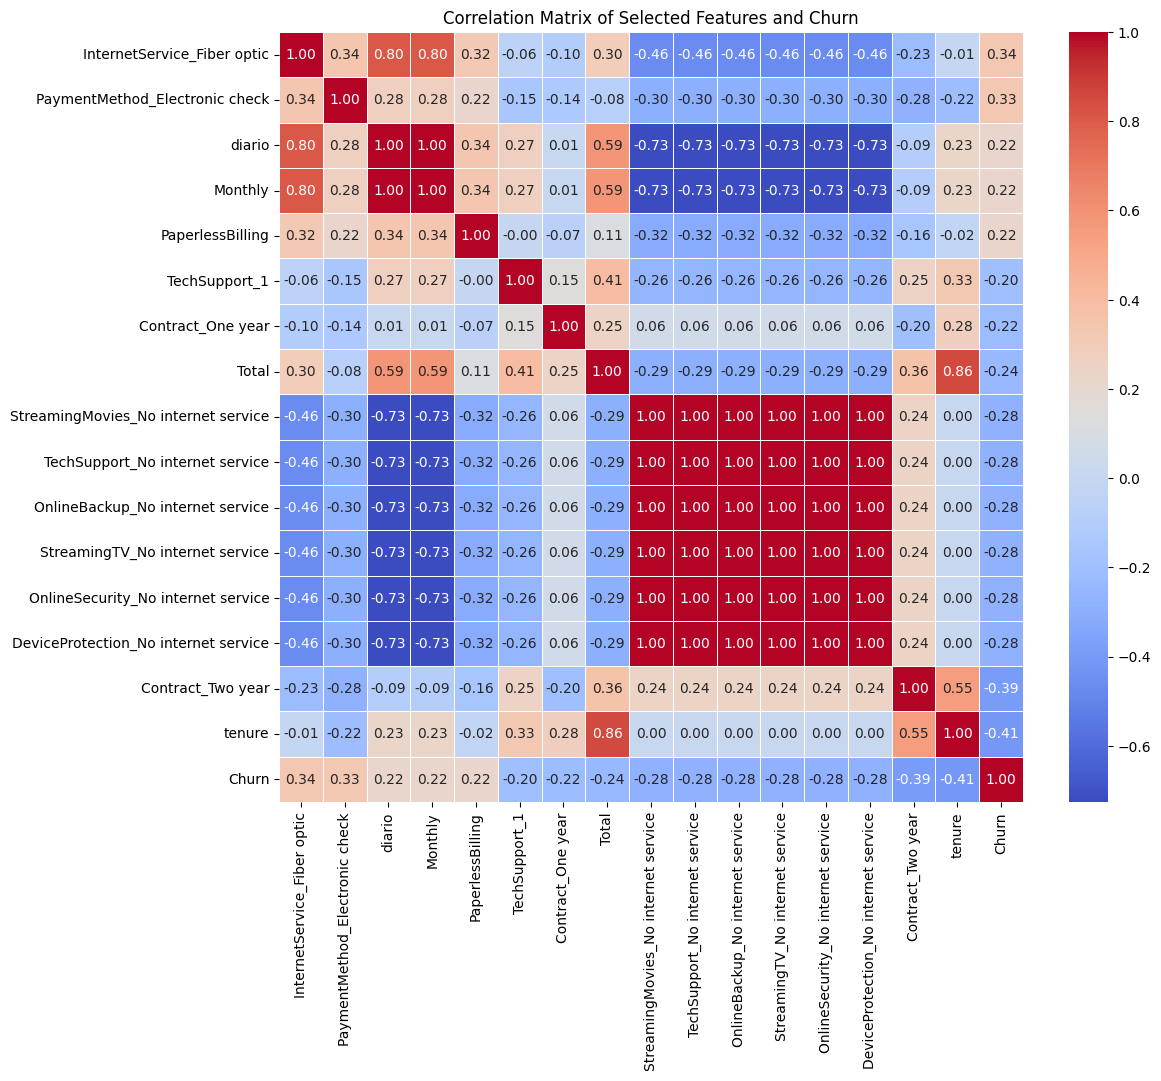

In [21]:
df_selected = X_selected.copy()
df_selected['Churn'] = y_selected

correlation_matrix_viz = df_selected.corr()

# Visualizar mapa de Calor
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_viz, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlacion vs Churn')
plt.show()

## Análisis Dirigido
Investiga cómo variables específicas se relacionan con la cancelación, tales como:

  Tiempo de contrato × Cancelación

  Gasto total × Cancelación

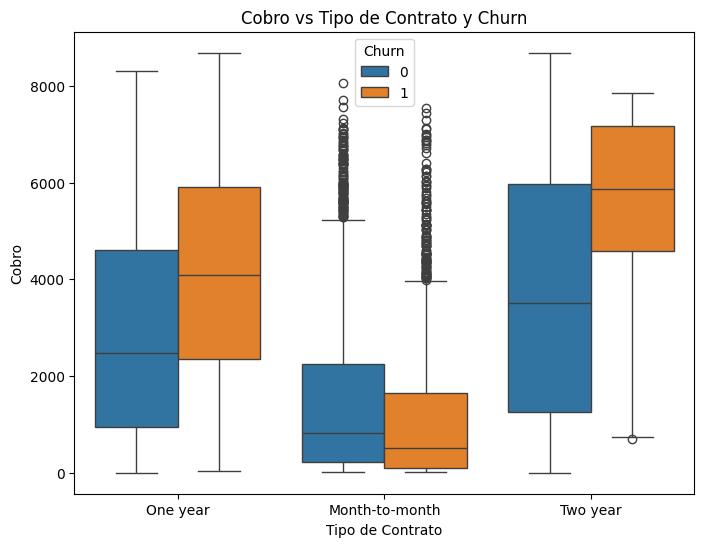

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x='Contract', y='Total', hue='Churn', data=df)
plt.title('Cobro vs Tipo de Contrato y Churn')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Cobro')
plt.show()

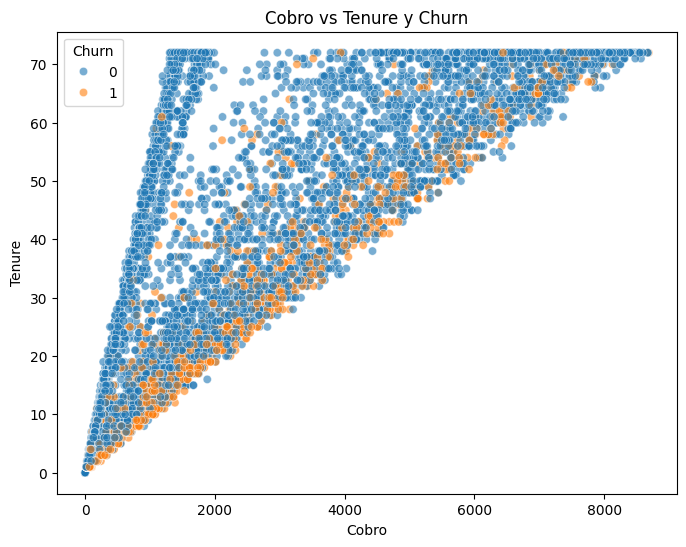

In [27]:
# Usando scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Total', y='tenure', hue='Churn', data=df, alpha=0.6)
plt.title('Cobro vs Tenure y Churn')
plt.xlabel('Cobro')
plt.ylabel('Tenure')
plt.show()

## Separación de Datos

In [29]:
from sklearn.model_selection import train_test_split

# Usando una proporcion 80/20 para entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_selected, test_size=0.2, random_state=42, stratify=y_selected)

print("Shape Datos de entrenamiento (X_train, y_train):", X_train.shape, y_train.shape)
print("Shape Datos de Test (X_test, y_test):", X_test.shape, y_test.shape)

Shape Datos de entrenamiento (X_train, y_train): (8278, 16) (8278,)
Shape Datos de Test (X_test, y_test): (2070, 16) (2070,)


## Creación de los Modelo
Entrenaremos dos modelos de clasificación: Regresión Logística y Árbol de Decisión.

La normalización (o estandarización) es crucial para los modelos que calculan distancias entre puntos de datos (como KNN y SVM) o que utilizan algoritmos de optimización sensibles a la magnitud de las características (como la Regresión Logística y las Redes Neuronales).
Sin un escalado adecuado, las características con valores más grandes pueden dominar los cálculos de distancia o las actualizaciones de parámetros durante el entrenamiento, haciendo que el modelo priorice esas características sin considerar su verdadero poder predictivo.
Esto puede llevar a un modelo sesgado con bajo rendimiento.
Por otro lado, los modelos basados en árboles toman decisiones basadas en umbrales de características individuales y no se ven afectados por la escala de los datos.


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Entrenamiento modelo Regresion Logística
log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train, y_train)

# Predicción y evaluación modelo
y_pred_log_reg = log_reg_model.predict(X_test)

print("Evaluacion Modelo Regresion Logística:")
print("Precisión:", accuracy_score(y_test, y_pred_log_reg))
print("Reporte Clasificación:\n", classification_report(y_test, y_pred_log_reg))
print("Matriz de Confusion:\n", confusion_matrix(y_test, y_pred_log_reg))

Evaluacion Modelo Regresion Logística:
Precisión: 0.7642512077294686
Reporte Clasificación:
               precision    recall  f1-score   support

           0       0.79      0.71      0.75      1035
           1       0.74      0.81      0.78      1035

    accuracy                           0.76      2070
   macro avg       0.77      0.76      0.76      2070
weighted avg       0.77      0.76      0.76      2070

Matriz de Confusion:
 [[740 295]
 [193 842]]


In [34]:
# Entrenamiento arbol de Decision
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Predicciones y arbol de decision
y_pred_decision_tree = decision_tree_model.predict(X_test)

print("\nEvaluacion modelo arbol de decision:")
print("Precision:", accuracy_score(y_test, y_pred_decision_tree))
print("Reporte Clasificación:\n", classification_report(y_test, y_pred_decision_tree))
print("Matriz de Confusion:\n", confusion_matrix(y_test, y_pred_decision_tree))


Evaluacion modelo arbol de decision:
Precision: 0.8570048309178744
Reporte Clasificación:
               precision    recall  f1-score   support

           0       0.92      0.78      0.85      1035
           1       0.81      0.93      0.87      1035

    accuracy                           0.86      2070
   macro avg       0.86      0.86      0.86      2070
weighted avg       0.86      0.86      0.86      2070

Matriz de Confusion:
 [[812 223]
 [ 73 962]]


# Evaluación de Modelos:

Basándonos en los resultados de la ejecución anterior:

**Modelo de Regresión Logística:**

* Exactitud (Accuracy): Aproximadamente 0.76
* Informe de Clasificación:
        Precision, Recall, y F1-score están alrededor de 0.74 a 0.81 para ambas clases (0 y 1).
*  Matriz de Confusión: Muestra la cantidad de verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos.

**Modelo de Árbol de Decisión:**

*  Exactitud (Accuracy): Aproximadamente 0.86
*  Informe de Clasificación:
        Precision, Recall, y F1-score son más altos que en la Regresión Logística, especialmente para la clase 0 (no cancelación), con valores alrededor de 0.81 a 0.93.
*  Matriz de Confusión: Muestra una mayor cantidad de verdaderos positivos y verdaderos negativos en comparación con la Regresión Logística.

Análisis Crítico y Comparación de Modelos:

*   El Modelo de Árbol de Decisión tuvo un mejor desempeño general en este conjunto de datos, basándonos en la exactitud y las métricas del informe de clasificación (Precision, Recall, F1-score). Su exactitud es notablemente mayor (0.86 vs 0.76), lo que indica que clasificó correctamente una mayor proporción de instancias en el conjunto de prueba.

*   Para determinar si hay overfitting o underfitting, necesitaríamos comparar el rendimiento del modelo en el conjunto de entrenamiento y en el conjunto de prueba. Sin embargo, basándonos únicamente en el rendimiento del conjunto de prueba:

  El Modelo de Regresión Logística parece tener un rendimiento aceptable, pero no sobresaliente. Podría estar subajustado (underfitting), lo que significa que es demasiado simple para capturar completamente la complejidad de la relación entre las características y la cancelación.
  
  Esto podría deberse a la linealidad inherente del modelo de Regresión Logística en comparación con la complejidad de los datos.
  
  El Modelo de Árbol de Decisión muestra un rendimiento significativamente mejor en el conjunto de prueba. Si el rendimiento en el conjunto de entrenamiento fuera mucho mayor que en el conjunto de prueba, podríamos sospechar sobreajuste (overfitting).

En resumen, el Árbol de Decisión tuvo un mejor desempeño en este caso, pero es importante validar su rendimiento en el conjunto de entrenamiento para descartar overfitting.

## Análisis de la Importancia de las Variables

Caracteristicas importantes Arbol de decisión:
Total                                   0.232197
Contract_Two year                       0.154998
Monthly                                 0.146653
diario                                  0.137445
tenure                                  0.120837
Contract_One year                       0.097835
InternetService_Fiber optic             0.033960
PaymentMethod_Electronic check          0.025427
PaperlessBilling                        0.024748
TechSupport_1                           0.016420
OnlineBackup_No internet service        0.006322
OnlineSecurity_No internet service      0.003040
StreamingTV_No internet service         0.000065
TechSupport_No internet service         0.000053
StreamingMovies_No internet service     0.000000
DeviceProtection_No internet service    0.000000
dtype: float64


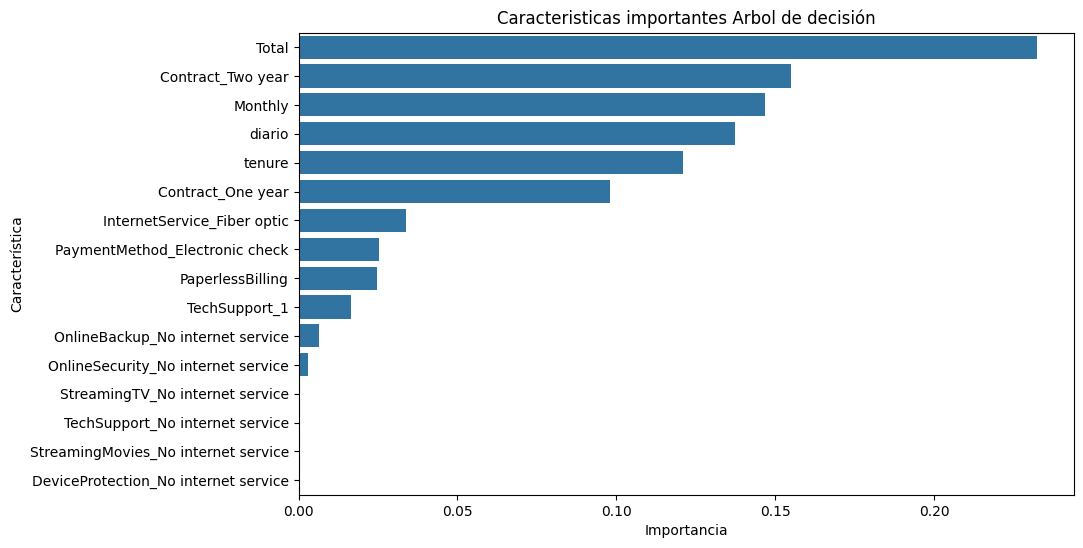

In [39]:
# Caracteristicas importantes Arbol de decisión
print("Caracteristicas importantes Arbol de decisión:")
feature_importance_dt = pd.Series(decision_tree_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print(feature_importance_dt)


plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_dt, y=feature_importance_dt.index)
plt.title('Caracteristicas importantes Arbol de decisión')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.show()


Coeficientes para Regresion Logística:
Total                                   0.652159
InternetService_Fiber optic             0.358790
PaymentMethod_Electronic check          0.257743
PaperlessBilling                        0.174146
Monthly                                -0.027345
diario                                 -0.027345
TechSupport_No internet service        -0.057348
StreamingMovies_No internet service    -0.057348
OnlineSecurity_No internet service     -0.057348
DeviceProtection_No internet service   -0.057348
OnlineBackup_No internet service       -0.057348
StreamingTV_No internet service        -0.057348
TechSupport_1                          -0.184364
Contract_One year                      -0.298849
Contract_Two year                      -0.611479
tenure                                 -1.260785
dtype: float64


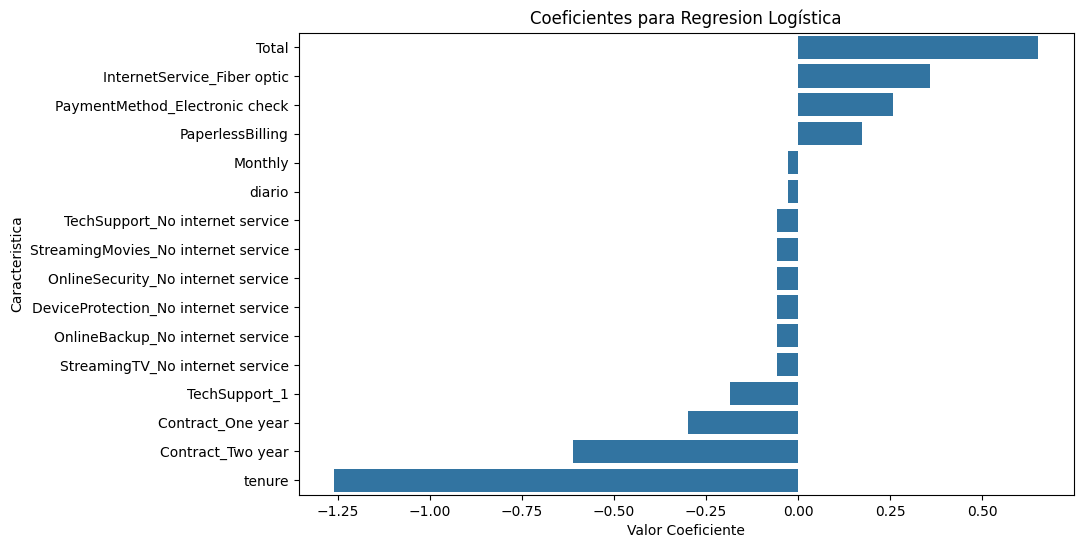

In [38]:
# Coeficientes para Regresion Logística
print("\nCoeficientes para Regresion Logística:")

coefficients_lr = pd.Series(log_reg_model.coef_[0], index=X_train.columns).sort_values(ascending=False)
print(coefficients_lr)

plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients_lr, y=coefficients_lr.index)
plt.title('Coeficientes para Regresion Logística')
plt.xlabel('Valor Coeficiente')
plt.ylabel('Caracteristica')
plt.show()

# Para el Árbol de Decisión:

La importancia de las características en el Árbol de Decisión se basa en cuánto reduce cada característica la impureza en las divisiones del árbol. Los valores más altos indican una mayor importancia.

Según el gráfico y la salida:

*  Total: Parece ser la variable más importante, lo que sugiere que el monto total que un cliente ha pagado tiene un peso significativo en la predicción de cancelación.

*  Contract_Two year y Monthly (y diario que es proporcional a Monthly): También son variables muy importantes. Ya que los clientes con contratos a largo plazo son menos propensos a cancelar, mientras que el cobro mensual y diario está relacionado con los servicios que tienen.

*  tenure: El tiempo que el cliente ha estado con la empresa también es un predictor importante, lo que indica que los clientes con mayor antigüedad tienden a ser menos propensos a cancelar.

*  Otras variables como Contract_One year, InternetService_Fiber optic, PaymentMethod_Electronic check, y PaperlessBilling también tienen cierta importancia, aunque menor que las anteriores.
    
* Las variables relacionadas con la falta de servicios (como StreamingMovies_No internet service, TechSupport_No internet service, etc.) y DeviceProtection_No internet service tienen una importancia muy baja o nula en este modelo.

# Para la Regresión Logística:

En la Regresión Logística, los coeficientes indican la dirección y la magnitud de la relación entre cada característica y el log-odds de la cancelación.

Un coeficiente positivo grande sugiere que un aumento en el valor de la característica aumenta la probabilidad de cancelación, mientras que un coeficiente negativo grande sugiere que un aumento disminuye la probabilidad.

Según el gráfico y la salida:

* tenure: Tiene el coeficiente negativo más grande, lo que indica que a mayor antigüedad del cliente, menor es la probabilidad de cancelación. Esta es una variable muy influyente en la dirección de la no cancelación.

* Contract_Two year y Contract_One year: También tienen coeficientes negativos grandes, lo que refuerza la idea de que los contratos a más largo plazo están asociados con una menor probabilidad de cancelación.

* Total: Tiene un coeficiente positivo grande, lo que sugiere que un mayor cobro total está asociado con una mayor probabilidad de cancelación.

* InternetService_Fiber optic y PaymentMethod_Electronic check: Tienen coeficientes positivos grandes, lo que indica que tener servicio de fibra óptica y utilizar el pago electrónico están asociados con una mayor probabilidad de cancelación.

* PaperlessBilling: También tiene un coeficiente positivo, sugiriendo una relación positiva con la cancelación.

* Las variables relacionadas con la falta de servicios (como StreamingMovies_No internet service, TechSupport_No internet service, etc.) tienen coeficientes negativos pequeños, lo que podría implicar que no tener estos servicios está ligeramente asociado con una menor probabilidad de cancelación.

* Monthly y diario: Tienen coeficientes muy cercanos a cero, lo que sugiere que, después de considerar otras variables, el cobro mensual/diario en sí mismo no tiene un impacto lineal fuerte en la probabilidad de cancelación en este modelo (a diferencia del Árbol de Decisión donde fue importante).

Comparación de la Importancia de Variables entre Modelos:

En general, las variables relacionadas con el tiempo que el cliente ha estado con la empresa (tenure), el tipo de contrato (Contract), el cobro total (Total), el tipo de servicio de internet (InternetService_Fiber optic), el método de pago (PaymentMethod_Electronic check), y la facturación sin papel (PaperlessBilling) parecen ser los predictores más influyentes de la cancelación en este conjunto de datos.

# Conclusión Estratégica

Basado en el análisis de datos y los modelos de clasificación entrenados, podemos extraer las siguientes conclusiones estratégicas con respecto a la cancelación de clientes (churn):

1.  **Predictores Clave de Cancelación:** El análisis de la importancia de las variables de los modelos de Árbol de Decisión y Regresión Logística destacó consistentemente varios factores clave fuertemente asociados con la cancelación de clientes:
    *   **Tenure (Antigüedad del cliente):** Los clientes con menor antigüedad tienen una probabilidad significativamente mayor de cancelar. Este es un indicador crítico, lo que sugiere que el período inicial de la relación de un cliente con Telecom X es crucial para la retención.
    *   **Tipo de Contrato:** Los clientes con contratos mes a mes tienen una propensión mucho mayor a cancelar en comparación con aquellos con contratos de uno o dos años. Esto enfatiza la importancia de alentar a los clientes a comprometerse a más largo plazo.
    *   **Cobro Total:** Si bien la interpretación difirió ligeramente entre los modelos, el Cobro Total parece ser un factor significativo. Cobros totales más altos pueden estar asociados con una mayor antigüedad, lo que reduce la cancelación, pero también potencialmente con ciertas combinaciones de servicios que podrían llevar a la insatisfacción.
    *   **Servicio de Internet (Fibra Óptica):** Los clientes con servicio de internet de Fibra Óptica muestran una mayor probabilidad de cancelar. Esto podría deberse a varios factores, como problemas de calidad del servicio, costos más altos u ofertas competitivas de servicios de fibra de otros proveedores.
    *   **Método de Pago (Cheque Electrónico):** Los clientes que utilizan cheques electrónicos como método de pago son más propensos a cancelar. Esto podría estar relacionado con ciertos datos demográficos o hábitos de pago que también están correlacionados con tasas de cancelación más altas.
    *   **Facturación sin Papel:** Los clientes que optan por la facturación sin papel también muestran una tendencia a cancelar. Similar a los cheques electrónicos, esto podría estar asociado con segmentos de clientes específicos.

2.  **Rendimiento del Modelo:**
    *   El modelo de **Árbol de Decisión** tuvo un mejor desempeño en términos de exactitud general (alrededor del 86%) en comparación con el modelo de Regresión Logística (alrededor del 76%) en el conjunto de prueba balanceado. Esto sugiere que las relaciones entre las características y la cancelación podrían no ser lineales, lo cual el Árbol de Decisión está mejor equipado para capturar.
    *   Si bien el Árbol de Decisión mostró un mejor rendimiento en el conjunto de prueba, es importante tener en cuenta el posible sobreajuste (overfitting), que es un problema común con los Árboles de Decisión. Una validación adicional en un conjunto de datos no visto o el uso de técnicas como la validación cruzada serían beneficiosos para confirmar su capacidad de generalización. El modelo de Regresión Logística, aunque más simple, podría ser menos propenso al sobreajuste, pero podría estar subajustando (underfitting) la complejidad de los datos.

3.  **Recomendaciones Estratégicas:**
    *   **Enfoque en la Interacción Temprana con el Cliente:** Dada la fuerte influencia de la antigüedad, implementar estrategias para mejorar la satisfacción y lealtad del cliente durante los meses iniciales del servicio es fundamental.
    *   **Promover Contratos a Más Largo Plazo:** Alentar activamente a los clientes con contratos mes a mes a cambiar a contratos de uno o dos años mediante incentivos o destacando los beneficios.
    *   **Investigar Problemas del Servicio de Fibra Óptica:** Analizar las razones detrás de la mayor cancelación entre los clientes de Fibra Óptica. Esto podría implicar encuestar a estos clientes, mejorar la calidad del servicio o abordar las preocupaciones sobre precios.
    *   **Analizar el Método de Pago y las Preferencias de Facturación:** Investigar más a fondo la correlación entre los cheques electrónicos y la facturación sin papel con la cancelación para comprender las razones subyacentes y potencialmente ofrecer soluciones alternativas o intervenciones dirigidas.
    *   **Considerar Modelos de Conjunto (Ensemble Models):** Explorar modelos más avanzados como Random Forests o Gradient Boosting (por ejemplo, XGBoost) que se basan en árboles de decisión pero son más robustos contra el sobreajuste y a menudo ofrecen un mejor rendimiento.

